In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# **Data Cleaning**

In [231]:
df = pd.read_csv('condo.csv')
df.head()

,Name,Price,Link,Amenities,Long Term,Minimum Stay,City,Neighborhood,Location,Floor,...,gym,restaurant,bank,pharmacy,police,subway_station,train_station,university,transit_station,bus_station
0,Semi Furnished Studio Unit at Residencia de Re...,12000,https://rentpad.com.ph/long-term-rentals/quezo...,24/7 Security; Swimming pool,"12,000 /Month",1 Year,Quezon City,Loyola Heights,Residencia de Regina,6.0,...,1,1,1,1,1,0,1,1,1,0
1,FOR LEASE 1 BR Condo Unit at High Park Towers ...,58000,https://rentpad.com.ph/long-term-rentals/quezo...,NaN,"58,000 /Month",1 Year,Quezon City,Diliman,High Park Vertis,15.0,...,1,1,1,1,1,0,0,1,1,1
2,1BR Fully Furnished Unit at Trees Residences Q...,14000,https://rentpad.com.ph/long-term-rentals/quezo...,Multi-Purpose Hall; 24/7 Security; Function Ro...,"14,000 /Month",6 Months,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,1,0,0,1,1,0
3,Studio Unit in Studio A Katipunan,22000,https://rentpad.com.ph/long-term-rentals/quezo...,Gym; Study Hall; 24/7 Security; Swimming pool,"22,000 /Month",1 Year,Quezon City,Loyola Heights,Studio A,27.0,...,1,1,1,1,1,0,1,1,1,0
4,Unfurnished 2BR Condo Trees Residences near SM...,18000,https://rentpad.com.ph/long-term-rentals/quezo...,Concierge; Jogging Trail; Gym; 24/7 Security; ...,"18,000 /Month",1 Year,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,0,0,0,1,1,1


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1659 non-null   object 
 1   Price            1659 non-null   int64  
 2   Link             1659 non-null   object 
 3   Amenities        1544 non-null   object 
 4   Long Term        1655 non-null   object 
 5   Minimum Stay     1640 non-null   object 
 6   City             1651 non-null   object 
 7   Neighborhood     1523 non-null   object 
 8   Location         1510 non-null   object 
 9   Floor            1247 non-null   float64
 10  Square Area      1650 non-null   float64
 11  Bedrooms         1659 non-null   int64  
 12  Bathrooms        1659 non-null   int64  
 13  Security         1426 non-null   float64
 14  Pool             1377 non-null   float64
 15  Airconditioning  476 non-null    float64
 16  Parking          557 non-null    float64
 17  Balcony       

In [233]:
drop_col=['Name', 'Link', 'Long Term', 'Minimum Stay', 'City', 'Neighborhood', 'Location', 'Floor', 'Updated', 'Longitude', 'Latitude', 'Address', 'Province', 'Region']
df.drop(drop_col, axis=1, inplace=True)

In [234]:
amenities_list = df['Amenities'].str.split(';').explode()

unique_amenities = amenities_list.dropna().str.strip().unique()

for amenity in unique_amenities:
    if amenity:
        df[amenity] = df['Amenities'].fillna('').str.contains(amenity).astype(int)

df.drop('Amenities', axis=1, inplace=True)

display(df.head())

,Price,Square Area,Bedrooms,Bathrooms,Security,Pool,Airconditioning,Parking,Balcony,Pets Allowed,...,24/7 Security,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,25.0,0,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,58000,61.0,1,1,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14000,25.0,1,1,1.0,1.0,NaN,0,0,0,...,1,1,1,1,0,0,0,0,0,0
3,22000,28.0,0,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,1,1,0,0,0,0
4,18000,30.0,2,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,1,0,1,1,0,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Square Area         1650 non-null   float64
 2   Bedrooms            1659 non-null   int64  
 3   Bathrooms           1659 non-null   int64  
 4   Security            1426 non-null   float64
 5   Pool                1377 non-null   float64
 6   Airconditioning     476 non-null    float64
 7   Parking             1659 non-null   int64  
 8   Balcony             1659 non-null   int64  
 9   Pets Allowed        1659 non-null   int64  
 10  Furnishing          1659 non-null   object 
 11  Rating              1084 non-null   float64
 12  ReviewsCount        1084 non-null   float64
 13  school              1659 non-null   int64  
 14  hospital            1659 non-null   int64  
 15  shopping_mall       1659 non-null   int64  
 16  superm

In [236]:
# one_hot_encoder = OneHotEncoder()
# one_hot_encoding = one_hot_encoder.fit_transform(df[['Furnishing']].values)
# df_one_hot = pd.DataFrame(one_hot_encoding.toarray(), columns=one_hot_encoder.get_feature_names_out(['Furnishing']))

# df = pd.concat([df, df_one_hot], axis=1)
# df.drop('Furnishing', axis=1, inplace=True)

# print(df.head())

label_encoder = LabelEncoder()
df['furnishing_label'] = label_encoder.fit_transform(df['Furnishing'])
print(df.head())

   Price  Square Area  Bedrooms  Bathrooms  Security  Pool  Airconditioning  \
0  12000         25.0         0          1       1.0   1.0              NaN   
1  58000         61.0         1          1       NaN   NaN              NaN   
2  14000         25.0         1          1       1.0   1.0              NaN   
3  22000         28.0         0          1       1.0   1.0              NaN   
4  18000         30.0         2          1       1.0   1.0              NaN   

   Parking  Balcony  Pets Allowed  ... Swimming pool  Multi-Purpose Hall  \
0        0        0             0  ...             1                   0   
1        0        0             0  ...             0                   0   
2        0        0             0  ...             1                   1   
3        0        0             0  ...             1                   0   
4        0        0             0  ...             1                   0   

   Function Rooms  Gym  Study Hall  Concierge  Jogging Trail  Play R

In [237]:
drop_col = ['Pool', '24/7 Security', 'gym', 'church', 'Pets Allowed', 'school', 'hospital', 'shopping_mall', 'supermarket', 'church', 'park', 'restaurant', 'bank', 'pharmacy', 'police', 'subway_station', 'train_station', 'university', 'transit_station', 'bus_station', 'Furnishing']
df.drop(drop_col, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Square Area         1650 non-null   float64
 2   Bedrooms            1659 non-null   int64  
 3   Bathrooms           1659 non-null   int64  
 4   Security            1426 non-null   float64
 5   Airconditioning     476 non-null    float64
 6   Parking             1659 non-null   int64  
 7   Balcony             1659 non-null   int64  
 8   Rating              1084 non-null   float64
 9   ReviewsCount        1084 non-null   float64
 10  Swimming pool       1659 non-null   int64  
 11  Multi-Purpose Hall  1659 non-null   int64  
 12  Function Rooms      1659 non-null   int64  
 13  Gym                 1659 non-null   int64  
 14  Study Hall          1659 non-null   int64  
 15  Concierge           1659 non-null   int64  
 16  Joggin

In [238]:
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,furnishing_label
0,12000,25.0,0,1,1.0,NaN,0,0,4.1,27.0,1,0,0,0,0,0,0,0,0,1
1,58000,61.0,1,1,NaN,NaN,0,0,4.4,44.0,0,0,0,0,0,0,0,0,0,0
2,14000,25.0,1,1,1.0,NaN,0,0,4.2,85.0,1,1,1,0,0,0,0,0,0,0
3,22000,28.0,0,1,1.0,NaN,0,0,NaN,NaN,1,0,0,1,1,0,0,0,0,0
4,18000,30.0,2,1,1.0,NaN,0,0,4.2,37.0,1,0,0,1,0,1,1,0,0,2


In [239]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['Square Area'] = median_imputer.fit_transform(df[['Square Area']])
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])
df['Price'] = median_imputer.fit_transform(df[['Price']])

In [240]:
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,furnishing_label
0,12000.0,25.0,0,1,1.0,NaN,0,0,4.1,27.0,1,0,0,0,0,0,0,0,0,1
1,58000.0,61.0,1,1,NaN,NaN,0,0,4.4,44.0,0,0,0,0,0,0,0,0,0,0
2,14000.0,25.0,1,1,1.0,NaN,0,0,4.2,85.0,1,1,1,0,0,0,0,0,0,0
3,22000.0,28.0,0,1,1.0,NaN,0,0,4.3,66.5,1,0,0,1,1,0,0,0,0,0
4,18000.0,30.0,2,1,1.0,NaN,0,0,4.2,37.0,1,0,0,1,0,1,1,0,0,2


In [241]:
df.fillna(0, inplace=True)
display(df.head(10))

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,furnishing_label
0,12000.0,25.00,0,1,1.0,0.0,0,0,4.1,27.0,1,0,0,0,0,0,0,0,0,1
1,58000.0,61.00,1,1,0.0,0.0,0,0,4.4,44.0,0,0,0,0,0,0,0,0,0,0
2,14000.0,25.00,1,1,1.0,0.0,0,0,4.2,85.0,1,1,1,0,0,0,0,0,0,0
3,22000.0,28.00,0,1,1.0,0.0,0,0,4.3,66.5,1,0,0,1,1,0,0,0,0,0
4,18000.0,30.00,2,1,1.0,0.0,0,0,4.2,37.0,1,0,0,1,0,1,1,0,0,2
5,80000.0,191.00,3,3,0.0,0.0,1,1,4.3,66.5,1,0,0,0,0,0,0,0,0,2
6,10000.0,28.00,1,1,0.0,0.0,0,0,4.3,66.5,0,0,0,0,0,0,0,0,0,2
7,65000.0,73.00,2,6,0.0,0.0,0,0,4.4,37.0,0,0,0,0,0,0,0,0,0,1
8,55000.0,61.00,1,1,1.0,1.0,0,1,4.4,44.0,1,0,1,1,0,1,0,1,1,0
9,25000.0,45.02,1,1,1.0,0.0,0,1,4.3,66.5,1,1,1,0,0,1,1,0,0,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   float64
 1   Square Area         1659 non-null   float64
 2   Bedrooms            1659 non-null   int64  
 3   Bathrooms           1659 non-null   int64  
 4   Security            1659 non-null   float64
 5   Airconditioning     1659 non-null   float64
 6   Parking             1659 non-null   int64  
 7   Balcony             1659 non-null   int64  
 8   Rating              1659 non-null   float64
 9   ReviewsCount        1659 non-null   float64
 10  Swimming pool       1659 non-null   int64  
 11  Multi-Purpose Hall  1659 non-null   int64  
 12  Function Rooms      1659 non-null   int64  
 13  Gym                 1659 non-null   int64  
 14  Study Hall          1659 non-null   int64  
 15  Concierge           1659 non-null   int64  
 16  Joggin

In [243]:
# df.to_csv('cleaned_condo_data.csv', index=False)

# **Feature Engineering**

In [244]:
df = pd.read_csv('cleaned_condo.csv')
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Furnishing,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label
0,101398,106,5,3,1,1,1,1,Fully Furnished,NaN,NaN,1,1,1,1,1,2
1,92131,48,4,2,1,1,1,1,Fully Furnished,4.5,152.0,1,1,1,1,1,2
2,42191,38,1,1,1,1,0,1,Semi Furnished,4.3,23.0,1,0,1,1,1,1
3,81355,40,5,1,1,1,1,1,Fully Furnished,4.4,7658.0,1,1,1,1,1,2
4,13066,28,0,1,1,1,0,1,Unfurnished,NaN,NaN,0,1,0,1,0,0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              1655 non-null   float64
 10  ReviewsCount        1655 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

In [246]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [247]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

In [248]:
df['price_per_sqm'] = df['Price'] / df['Square Area']

amenity_columns = ['Security', 'Airconditioning', 'Parking', 'Balcony', 
                   'Swimming pool', 'Multi-Purpose Hall', 'Function Rooms', 
                   'Gym', 'Study Hall']
df['amenities_count'] = df[amenity_columns].sum(axis=1)

def categorize_size(area):
    if area < 30:
        return "0"
    elif area < 50:
        return "1"
    elif area < 75:
        return "2"
    else:
        return "3"

df['size_category'] = df['Square Area'].apply(categorize_size)

print("New features created:")
print(f"Price per sqm: {df['price_per_sqm'].describe()}")
print(f"\nAmenities count: {df['amenities_count'].value_counts().sort_index()}")
print(f"\nSize category distribution: {df['size_category'].value_counts()}")

print("\nFirst 5 rows with new features:")
print(df[['Price', 'Square Area', 'price_per_sqm', 'amenities_count', 'size_category']].head())

New features created:
Price per sqm: count    2999.000000
mean     1376.454403
std       504.858887
min       106.360000
25%      1073.777311
50%      1390.289474
75%      1696.289474
max      2978.580000
Name: price_per_sqm, dtype: float64

Amenities count: amenities_count
1        9
2       30
3       84
4      148
5      188
6      164
7      171
8      329
9     1089
10     787
Name: count, dtype: int64

Size category distribution: size_category
1    1180
3     675
2     667
0     477
Name: count, dtype: int64

First 5 rows with new features:
    Price  Square Area  price_per_sqm  amenities_count size_category
0  101398          106     956.584906                9             3
1   92131           48    1919.395833                9             1
2   42191           38    1110.289474                7             1
3   81355           40    2033.875000                9             1
4   13066           28     466.642857                5             0


In [249]:
print("=== Data Analysis for Demand Classification ===")
print(f"Price per sqm statistics:")
print(df['price_per_sqm'].describe())
print(f"\nSize category distribution:")
print(df['size_category'].value_counts())
print(f"\nRating distribution:")
print(df['Rating'].describe())

price_per_sqm_low = df['price_per_sqm'].quantile(0.4)
price_per_sqm_high = df['price_per_sqm'].quantile(0.75)
amenities_low = df['amenities_count'].quantile(0.4)
amenities_high = df['amenities_count'].quantile(0.8)
rating_threshold = df['Rating'].quantile(0.6)

print(f"\n=== Refined Demand Classification Thresholds ===")
print(f"Price per sqm - Affordable: ≤{price_per_sqm_low:.2f}, Expensive: ≥{price_per_sqm_high:.2f}")
print(f"Amenities count - Low: ≤{amenities_low:.0f}, High: ≥{amenities_high:.0f}")
print(f"Rating threshold: ≥{rating_threshold:.2f}")
print(f"\n=== SIZE CATEGORY WEIGHTS (BIGGEST FACTOR) ===")
print(f"Studio (0): +5 points (most popular)")
print(f"Small (1): +4 points (very popular)")
print(f"Medium (2): +1 point (moderate popularity)")
print(f"Large (3): -3 points (least popular, expensive)")

def classify_occupancy_demand_refined(row):
    """
    Updated classification with SIZE CATEGORY as the biggest factor:
    1. SIZE CATEGORY (BIGGEST FACTOR): Studio (0) and Small (1) are most popular
    2. Affordability (price per sqm)
    3. Amenities and comfort features
    4. Quality indicators (rating)
    5. Essential features (parking, AC)
    """
    
    high_demand_factors = 0
    low_demand_factors = 0
    
    # SIZE CATEGORY - THE BIGGEST FACTOR (weighted heavily)
    if row['size_category'] == '0':  # Studio - most popular
        high_demand_factors += 5  # Highest boost
    elif row['size_category'] == '1':  # Small - very popular
        high_demand_factors += 4  # High boost
    elif row['size_category'] == '2':  # Medium - moderate popularity
        high_demand_factors += 1  # Small boost
    else:  # Large (3) - least popular due to high cost
        low_demand_factors += 3  # Significant penalty
    
    # Price affordability (secondary factor)
    if row['price_per_sqm'] <= price_per_sqm_low:
        high_demand_factors += 2  # Very affordable
    elif row['price_per_sqm'] >= price_per_sqm_high:
        low_demand_factors += 1  # Expensive
    
    # Amenities (supporting factor)
    if row['amenities_count'] >= amenities_high:
        high_demand_factors += 1  # Good amenities
    elif row['amenities_count'] <= amenities_low:
        low_demand_factors += 1  # Limited amenities
    
    # Quality indicators (supporting factor)
    if row['Rating'] >= rating_threshold:
        high_demand_factors += 1  # Good rating
    elif row['Rating'] < 4.0:
        low_demand_factors += 1  # Poor rating
    
    # Essential features (smaller impact)
    if row['Parking'] == 1:
        high_demand_factors += 1  # Parking is important
    
    if row['Airconditioning'] == 1:
        high_demand_factors += 1  # AC is important
    
    if row['Security'] == 1:
        high_demand_factors += 0.5  # Nice to have
        
    if row['Balcony'] == 1:
        high_demand_factors += 0.5  # Nice to have
    
    # Calculate final score with size category as dominant factor
    net_score = high_demand_factors - low_demand_factors
    
    # Adjusted thresholds to reflect size category importance
    if net_score >= 5:  # Very high demand (mainly Studio/Small with good features)
        return '2'
    elif net_score >= 2:  # Medium demand 
        return '1'
    else:  # Low demand (mainly Large units or poor features)
        return '0'

df['occupancy_demand'] = df.apply(classify_occupancy_demand_refined, axis=1)

print(f"\n=== Occupancy Demand Classification Results ===")
demand_distribution = df['occupancy_demand'].value_counts()
print(f"Demand distribution:")
print(demand_distribution)
print(f"\nPercentage distribution:")
print((demand_distribution / len(df) * 100).round(2))

print(f"\n=== Average Characteristics by Demand Category ===")
demand_analysis = df.groupby('occupancy_demand').agg({
    'price_per_sqm': 'mean',
    'amenities_count': 'mean',
    'Rating': 'mean',
    'Square Area': 'mean',
    'Parking': 'mean',
    'Airconditioning': 'mean'
}).round(2)
print(demand_analysis)

print(f"\n=== Sample Properties by Demand Category ===")
for demand_code, demand_label in [('2', 'High Demand'), ('1', 'Medium Demand'), ('0', 'Low Demand')]:
    if demand_code in df['occupancy_demand'].values:
        print(f"\n{demand_label} (code {demand_code}) examples:")
        sample = df[df['occupancy_demand'] == demand_code][['Price', 'Square Area', 'price_per_sqm', 
                                                            'amenities_count', 'size_category', 'Rating', 
                                                            'Parking', 'Airconditioning', 'occupancy_demand']].head(3)
        print(sample.to_string(index=False))
    else:
        print(f"\nNo {demand_label} (code {demand_code}) properties found")

=== Data Analysis for Demand Classification ===
Price per sqm statistics:
count    2999.000000
mean     1376.454403
std       504.858887
min       106.360000
25%      1073.777311
50%      1390.289474
75%      1696.289474
max      2978.580000
Name: price_per_sqm, dtype: float64

Size category distribution:
size_category
1    1180
3     675
2     667
0     477
Name: count, dtype: int64

Rating distribution:
count    2999.000000
mean        4.302467
std         0.281318
min         1.000000
25%         4.300000
50%         4.300000
75%         4.300000
max         5.000000
Name: Rating, dtype: float64

=== Refined Demand Classification Thresholds ===
Price per sqm - Affordable: ≤1268.32, Expensive: ≥1696.29
Amenities count - Low: ≤9, High: ≥10
Rating threshold: ≥4.30

=== SIZE CATEGORY WEIGHTS (BIGGEST FACTOR) ===
Studio (0): +5 points (most popular)
Small (1): +4 points (very popular)
Medium (2): +1 point (moderate popularity)
Large (3): -3 points (least popular, expensive)

=== Occupanc

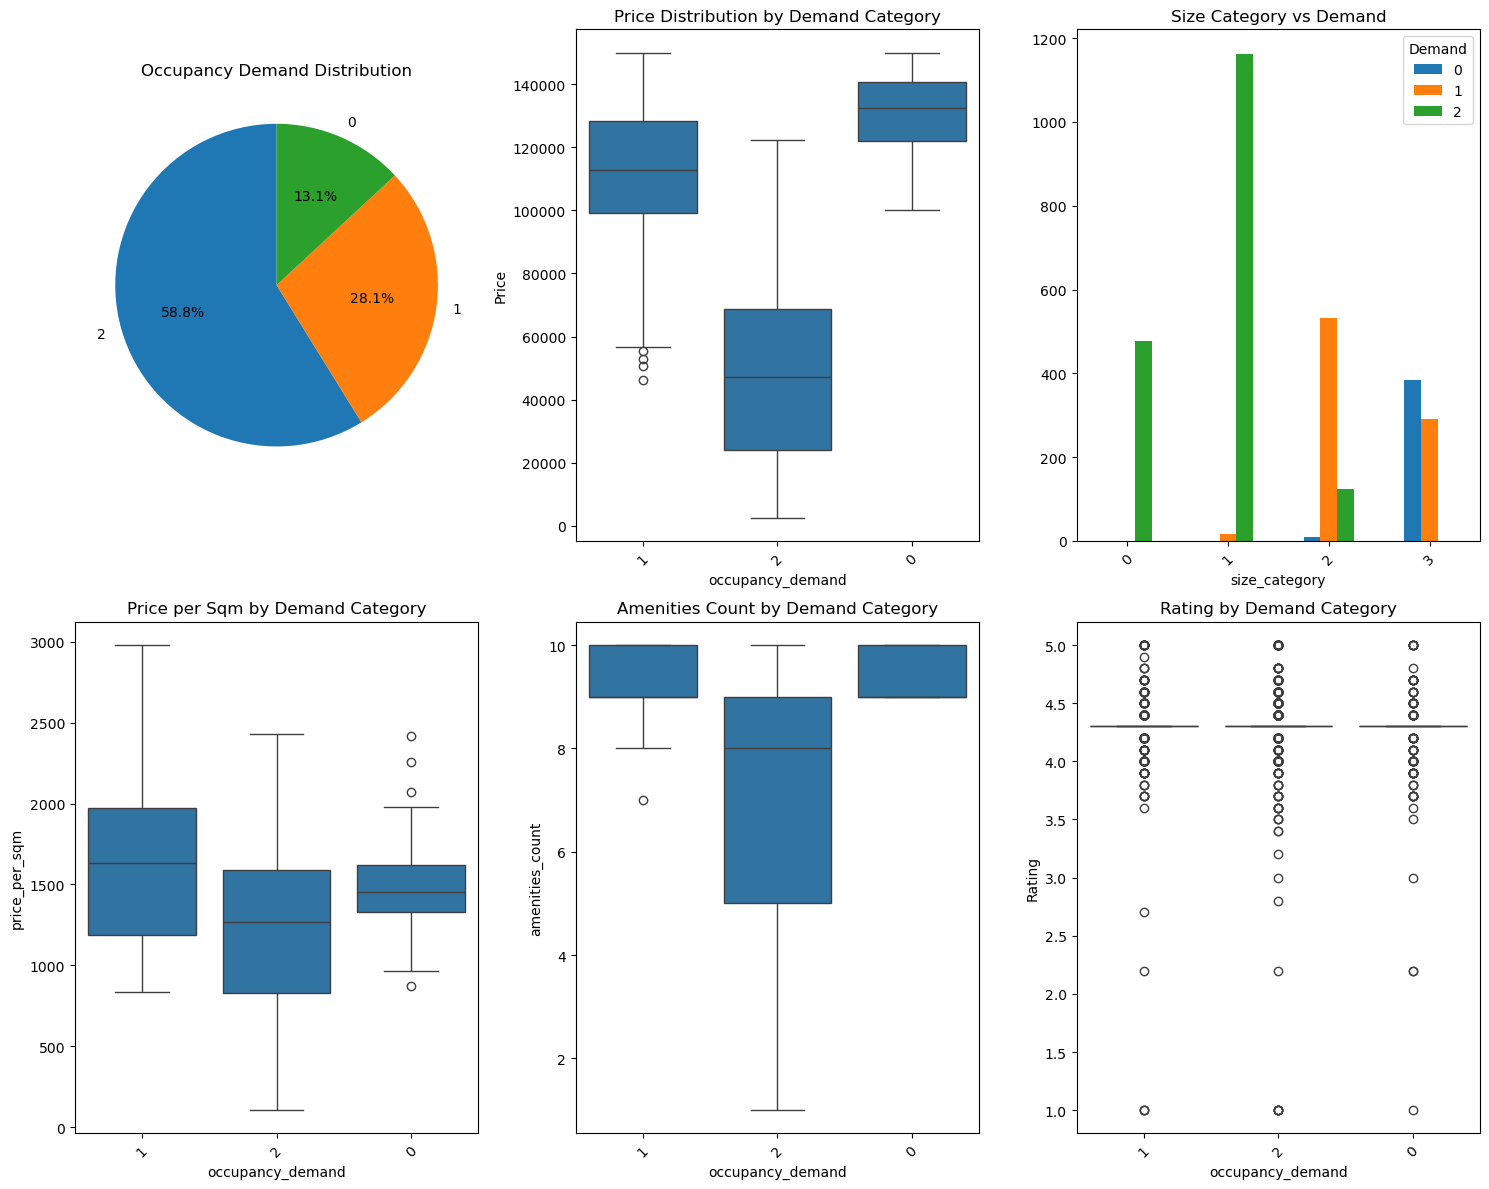

In [250]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
demand_counts = df['occupancy_demand'].value_counts()
plt.pie(demand_counts.values, labels=demand_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Occupancy Demand Distribution')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='occupancy_demand', y='Price')
plt.title('Price Distribution by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
demand_size_crosstab = pd.crosstab(df['size_category'], df['occupancy_demand'])
demand_size_crosstab.plot(kind='bar', ax=plt.gca())
plt.title('Size Category vs Demand')
plt.xticks(rotation=45)
plt.legend(title='Demand')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='occupancy_demand', y='price_per_sqm')
plt.title('Price per Sqm by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='occupancy_demand', y='amenities_count')
plt.title('Amenities Count by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='occupancy_demand', y='Rating')
plt.title('Rating by Demand Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

In [252]:
df.head(20)

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Furnishing,Rating,...,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,price_per_sqm,amenities_count,size_category,occupancy_demand
0,101398,106,5,3,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,956.584906,9,3,1
1,92131,48,4,2,1,1,1,1,Fully Furnished,4.5,...,1,1,1,1,1,2,1919.395833,9,1,2
2,42191,38,1,1,1,1,0,1,Semi Furnished,4.3,...,1,0,1,1,1,1,1110.289474,7,1,2
3,81355,40,5,1,1,1,1,1,Fully Furnished,4.4,...,1,1,1,1,1,2,2033.875000,9,1,2
4,13066,28,0,1,1,1,0,1,Unfurnished,4.3,...,0,1,0,1,0,0,466.642857,5,0,2
5,87820,52,5,2,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,1688.846154,9,2,1
6,127250,110,6,2,1,1,1,1,Fully Furnished,4.6,...,1,1,1,1,1,2,1156.818182,9,3,1
7,18506,30,1,1,1,1,0,0,Unfurnished,4.3,...,0,0,0,0,1,0,616.866667,3,1,2
8,35073,31,2,2,1,1,0,1,Semi Furnished,4.3,...,1,1,0,1,1,1,1131.387097,7,1,2
9,145568,52,5,2,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,2799.384615,9,2,1


In [253]:
df.to_csv('final_condo_data.csv', index=False)